In [48]:
import os
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
import soundfile as sf
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, Flatten, Input, Attention
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Path to dataset
mypath = r"C:\Users\chatt\Desktop\Project\KAUH Dataset\Audio Files"
filenames = [f for f in os.listdir(mypath) if f.endswith('.wav')]
filepaths = [os.path.join(mypath, f) for f in filenames]

# Feature Extraction Function
def extract_features(file_path, sr=22050):
    try:
        audio, _ = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        return np.mean(mfcc.T, axis=0)
    except Exception as e:
        print(f"Error in feature extraction: {e}")
        return None

# Data Preparation
X, y = [], []
for file in filepaths:
    feature = extract_features(file)
    if feature is not None:
        X.append(feature)
        y.append("Asthma" if "Asthma" in file else "COPD")  # Adjust label extraction as needed

X = np.array(X)
y = LabelEncoder().fit_transform(y)
X = StandardScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define 1D CNN Model
def build_1dcnn(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define Bi-GRU Model
def build_bi_gru(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        GRU(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3, bidirectional=True),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# 1D CNN + Bi-GRU + Attention
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()
    def call(self, inputs):
        scores = tf.nn.softmax(inputs, axis=1)
        return inputs * scores

def build_cnn_bi_gru_attention(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=3, activation='relu')(inputs)
    x = GRU(64, return_sequences=True, bidirectional=True)(x)
    x = AttentionLayer()(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    return model

# AST Model (Placeholder)
def build_ast_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Autoencoder Model
def build_autoencoder(input_shape):
    inputs = Input(shape=input_shape)
    encoded = Dense(64, activation='relu')(inputs)
    decoded = Dense(input_shape[0], activation='sigmoid')(encoded)
    autoencoder = Model(inputs, decoded)
    return autoencoder

# GAN Model (Placeholder)
def build_gan(input_shape):
    generator = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape[0],)),
        Dense(input_shape[0], activation='tanh')
    ])
    return generator

# Select and Compile a Model (Example: 1D CNN)
model = build_1dcnn((X_train.shape[1], 1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test))

# Evaluate
loss, acc = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


Epoch 1/100


c:\Users\chatt\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8602 - loss: 0.5103 - val_accuracy: 0.8676 - val_loss: 0.4756
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8475 - loss: 0.4706 - val_accuracy: 0.8676 - val_loss: 0.4196
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8168 - loss: 0.4708 - val_accuracy: 0.8676 - val_loss: 0.4208
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8079 - loss: 0.4918 - val_accuracy: 0.8676 - val_loss: 0.4142
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8586 - loss: 0.4050 - val_accuracy: 0.8676 - val_loss: 0.4285
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8171 - loss: 0.4449 - val_accuracy: 0.8676 - val_loss: 0.4212
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8395 - loss: 0.4012 - val_accuracy: 0.8676 - val_loss: 0.4316
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8702 - loss: 0.3799 - val_accuracy: 0.8676 - val_loss: 0.

✅ Final Training Accuracy: 96.27%
✅ Final Validation Accuracy: 83.82%
✅ Final Training Loss: 0.0887
✅ Final Validation Loss: 0.7540


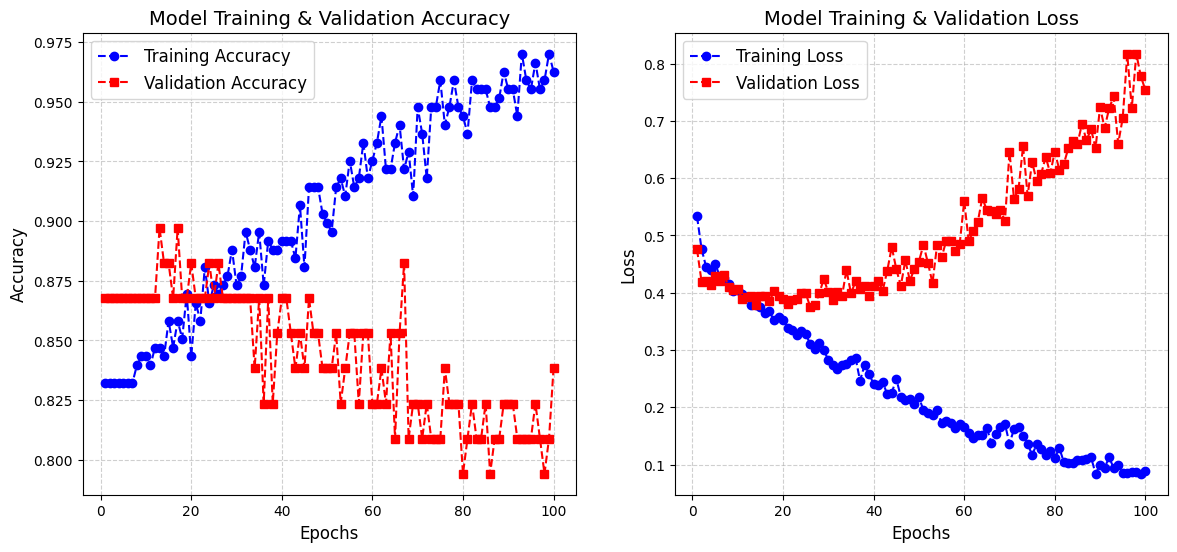

In [49]:
import matplotlib.pyplot as plt

# ✅ Extract Training History
train_acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])
train_loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])
epochs = range(1, len(train_acc) + 1)

if train_acc and val_acc and train_loss and val_loss:
    # ✅ Print Final Accuracy & Loss
    print(f"✅ Final Training Accuracy: {train_acc[-1] * 100:.2f}%")
    print(f"✅ Final Validation Accuracy: {val_acc[-1] * 100:.2f}%")
    print(f"✅ Final Training Loss: {train_loss[-1]:.4f}")
    print(f"✅ Final Validation Loss: {val_loss[-1]:.4f}")

    # ✅ Plot Accuracy
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, label='Training Accuracy', color='blue', linestyle='dashed', marker='o', markersize=6)
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='red', linestyle='dashed', marker='s', markersize=6)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.title("Model Training & Validation Accuracy", fontsize=14)

    # ✅ Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label='Training Loss', color='blue', linestyle='dashed', marker='o', markersize=6)
    plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='dashed', marker='s', markersize=6)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.title("Model Training & Validation Loss", fontsize=14)

    # ✅ Save & Show Plot
    plt.savefig("Training_Validation_Accuracy_Loss100epoch.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("⚠️ No training history found. Ensure the model was trained correctly.")
